Md. Abdullah Ibna Harun	193-15-13426	abdullah15-13426@diu.edu.bd

Mahade Hasan Forhad	193-15-13355	mahade15-13355@diu.edu.bd

https://github.com/mdabdullahibnaharun/youtube-spam-comment-ditector

## Import modules dataset

In [ ]:
#-------------- Youtube Spam Comment Detector--------------------#

# converting words into vectors to use as fetures to help in classification

#EDA packages
import pandas as pd
import numpy as np


In [ ]:
# Ml packages for vectorization of text for feature extraction

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Visualization packages

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Youtube01-Psy.csv to Youtube01-Psy.csv
Saving Youtube02-KatyPerry.csv to Youtube02-KatyPerry.csv
Saving Youtube03-LMFAO.csv to Youtube03-LMFAO.csv
Saving Youtube04-Eminem.csv to Youtube04-Eminem.csv
Saving Youtube05-Shakira.csv to Youtube05-Shakira.csv
User uploaded file "Youtube01-Psy.csv" with length 57438 bytes
User uploaded file "Youtube02-KatyPerry.csv" with length 64279 bytes
User uploaded file "Youtube03-LMFAO.csv" with length 64419 bytes
User uploaded file "Youtube04-Eminem.csv" with length 82896 bytes
User uploaded file "Youtube05-Shakira.csv" with length 72706 bytes


In [ ]:
#Dataset from Kaggle
df1 = pd.read_csv("Youtube01-Psy.csv")
df1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
#load all dataset to mearge them
df2 = pd.read_csv("Youtube02-KatyPerry.csv")
df3 = pd.read_csv("Youtube03-LMFAO.csv")
df4= pd.read_csv("Youtube04-Eminem.csv")
df5= pd.read_csv("Youtube05-Shakira.csv")

## Data Visualization

<BarContainer object of 2 artists>

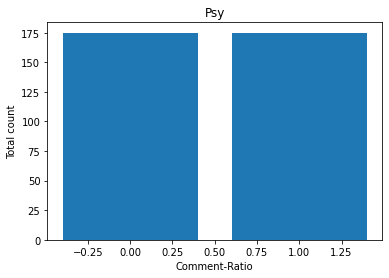

In [ ]:
data = df1['CLASS'].value_counts()
name= data.index
count = data.values 

plt.title("Psy")
plt.xlabel('Comment-Ratio')
plt.ylabel('Total count')

plt.bar(name,count)

<BarContainer object of 2 artists>

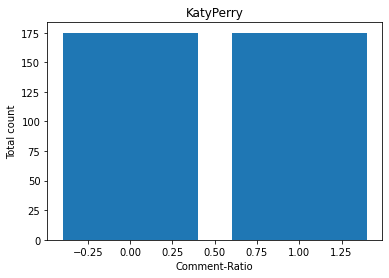

In [ ]:
data = df2['CLASS'].value_counts()
name= data.index
count = data.values 

plt.title("KatyPerry")
plt.xlabel('Comment-Ratio')
plt.ylabel('Total count')

plt.bar(name,count)

<BarContainer object of 2 artists>

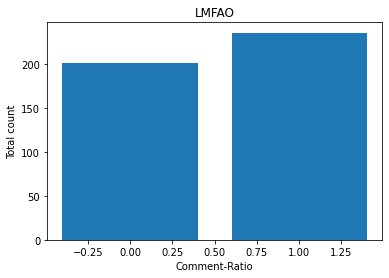

In [ ]:
data = df3['CLASS'].value_counts()
name= data.index
count = data.values 

plt.title("LMFAO")
plt.xlabel('Comment-Ratio')
plt.ylabel('Total count')


plt.bar(name,count)

<BarContainer object of 2 artists>

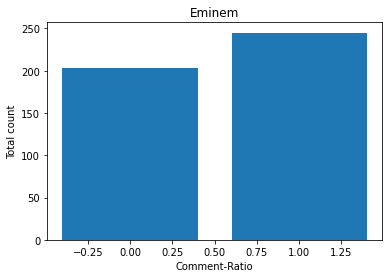

In [ ]:
data = df4['CLASS'].value_counts()
name= data.index
count = data.values 

plt.title("Eminem")
plt.xlabel('Comment-Ratio')
plt.ylabel('Total count')

plt.bar(name,count)

<BarContainer object of 2 artists>

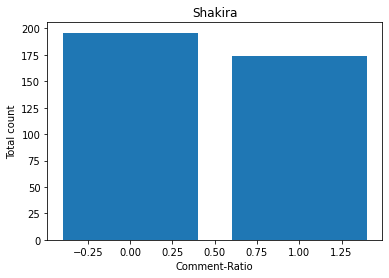

In [ ]:
data = df5['CLASS'].value_counts()
name= data.index
count = data.values 

plt.title("Shakira")
plt.xlabel('Comment-Ratio')
plt.ylabel('Total count')

plt.bar(name,count)

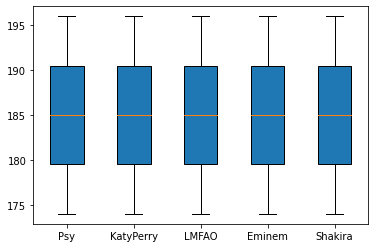

In [ ]:
value1=df5['CLASS'].value_counts()
value2=df5['CLASS'].value_counts()
value3=df5['CLASS'].value_counts()
value4=df5['CLASS'].value_counts()
value5=df5['CLASS'].value_counts()
box_plot_data = [value1, value2, value3, value4, value5]

plt.boxplot(box_plot_data,patch_artist=True,labels = ['Psy' , 'KatyPerry','LMFAO','Eminem','Shakira'])
plt.show()

## Preprocessing

In [ ]:
frames = [df1,df2,df3,df4,df5]

In [ ]:
df_mearged = pd.concat(frames)

In [ ]:
df_mearged

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
# total size
df_mearged.shape

(1956, 5)

In [ ]:
# mearging with keys
keys = ["Psy","KatyPerry","LMFAO","Eminem","Shakira"]
df_with_keys = pd.concat(frames,keys = keys)
df_with_keys

COMMENT_ID  \
Psy     0    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU   
        1    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A   
        2    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8   
        3            z13jhp0bxqncu512g22wvzkasxmvvzjaz04   
        4            z13fwbwp1oujthgqj04chlngpvzmtt3r3dw   
...                                                  ...   
Shakira 365  _2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA   
        366  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI   
        367  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs   
        368  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0   
        369  _2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA   

                           AUTHOR                        DATE  \
Psy     0               Julius NM         2013-11-07T06:20:48   
        1             adam riyati         2013-11-07T12:37:15   
        2        Evgeny Murashkin         2013-11-08T17:34:21   
        3         ElNino Melendez         2013-11-09T08:28:43   
        4                  GsMega         2013-11-10T16:05:38   
...                           ...                         ...   
Shakira 365          Katie Mettam  2013-07-13T13:27:39.441000   
        366  Sabina Pearson-Smith  2013-07-13T13:14:30.021000   
        367         jeffrey jules  2013-07-13T12:09:31.188000   
        368        Aishlin Maciel  2013-07-13T11:17:52.308000   
        369           Latin Bosch  2013-07-12T22:33:27.916000   

                                                       CONTENT  CLASS  
Psy     0    Huh, anyway check out this you[tube] channel: ...      1  
        1    Hey guys check out my new channel and our firs...      1  
        2               just for test I have to say murdev.com      1  
        3     me shaking my sexy ass on my channel enjoy ^_^ ﻿      1  
        4              watch?v=vtaRGgvGtWQ   Check this out .﻿      1  
...                                                        ...    ...  
Shakira 365  I love this song because we sing it at Camp al...      0  
        366  I love this song for two reasons: 1.it is abou...      0  
        367                                                wow      0  
        368                            Shakira u are so wiredo      0  
        369                         Shakira is the best dancer      0  

[1956 rows x 5 columns]

In [ ]:
# checking for only comments on psy
df_with_keys.loc["Psy"]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [ ]:
# save and write mearge data to a csv file
df_with_keys.to_csv("YoutubeSpamMergedData01.csv")

## Data Visualization after Preprocessing

In [ ]:
# getting data from mearge dataset.

df= pd.read_csv("YoutubeSpamMergedData01.csv")
df


,Unnamed: 0,Unnamed: 1,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,Psy,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,Psy,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Psy,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,Psy,3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,Psy,4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...,...,...
1951,Shakira,365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,Shakira,366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,Shakira,367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,Shakira,368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
#data size
df.size

13692

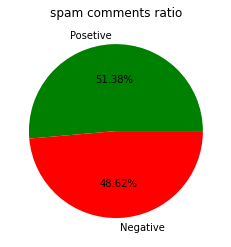

In [ ]:
slices = df['CLASS'].value_counts()
activity = ['Posetive' , 'Negative']
cols = ['g','r']

plt.pie(slices,
        labels = activity,
        colors = cols,
        startangle = 0,
        shadow = False,
        explode = (0,0),
        autopct = "%1.2f%%",
        radius = 1)

plt.title('spam comments ratio')
plt.show()

## Data cleaning

In [ ]:
# checking for consistent column name
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT',
       'CLASS'],
      dtype='object')

In [ ]:
# checking data types
df.dtypes

Unnamed: 0    object
Unnamed: 1     int64
COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [ ]:
# checking for missing nan
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

In [ ]:
# check for date
df['DATE']

0              2013-11-07T06:20:48
1              2013-11-07T12:37:15
2              2013-11-08T17:34:21
3              2013-11-09T08:28:43
4              2013-11-10T16:05:38
                   ...            
1951    2013-07-13T13:27:39.441000
1952    2013-07-13T13:14:30.021000
1953    2013-07-13T12:09:31.188000
1954    2013-07-13T11:17:52.308000
1955    2013-07-12T22:33:27.916000
Name: DATE, Length: 1956, dtype: object

In [ ]:
# getting author details 
df.AUTHOR
# if i convert the auther name to first and last bname then
#df[["FIRSTNAME"],["LASTNAME"]] = df['AUTHOR'].str.split(expand=True)

0                  Julius NM
1                adam riyati
2           Evgeny Murashkin
3            ElNino Melendez
4                     GsMega
                ...         
1951            Katie Mettam
1952    Sabina Pearson-Smith
1953           jeffrey jules
1954          Aishlin Maciel
1955             Latin Bosch
Name: AUTHOR, Length: 1956, dtype: object

In [ ]:
## working with text content
df_data = df[['CONTENT','CLASS']]
# to see those values content =  comments && class = true/false
df_data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [ ]:
# to see new dataset coluimns
df_data.columns

Index(['CONTENT', 'CLASS'], dtype='object')

In [ ]:
# inserting data inn x,y for visualization
df_x = df_data['CONTENT']
df_y = df_data['CLASS']

## Feature Selection

In [ ]:
### Feature Extraction From Text

#1 CountVectorizer
#2 TfidfVectorizer

cv = CountVectorizer()

ex = cv.fit_transform(["Great song but check this out","What is this song"])

In [ ]:
# convertion to arry
ex.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 1]])

In [ ]:
# gettingh feature name
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['but', 'check', 'great', 'is', 'out', 'song', 'this', 'what']

## Feature Extraction and Feature Engineering

In [ ]:
# extrat feature with CountVectorizer
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [ ]:
# convertingf x to an aray
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# get the feature names
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '018',
 '02',
 '034',
 '04',
 '047000',
 '05',
 '053012',
 '0687119038',
 '08',
 '09',
 '0cb8qfjaa',
 '0d878a889c',
 '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks',
 '0laviqu2b',
 '10',
 '100',
 '1000',
 '10000000',
 '1000000000',
 '100000415527985',
 '100005244783212',
 '100007085325116',
 '10001',
 '100877300245414',
 '101721377578919894134',
 '10200253113705769',
 '1030',
 '104999962146104962510',
 '10626048',
 '10626835',
 '106865403',
 '107297364',
 '1073741825',
 '1073741828',
 '1073741830',
 '1073741943',
 '108k',
 '109',
 '10b35481',
 '11',
 '1111',
 '1111111111111111111',
 '111719098841907',
 '111982027348137311818',
 '112720997191206369631',
 '11cpwb',
 '11th',
 '12',
 '123',
 '124',
 '124923004',
 '126',
 '127',
 '128gb',
 '12year',
 '13',
 '13017194',
 '131275322914',
 '131338190916',
 '1337',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '134

## Model Building

In [ ]:
# module building
from sklearn.model_selection import train_test_split

In [ ]:
#training
X_train,X_test,y_train,y_test = train_test_split(X,df_y,test_size=0.33,random_state = 42)

In [ ]:
# see X_train
X_train

<1310x4454 sparse matrix of type '<class 'numpy.int64'>'
	with 17525 stored elements in Compressed Sparse Row format>

## Analyzer and apply algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
KNNC = KNeighborsClassifier()
KNNC.fit(X_train,y_train)
print(f"Train Accuracy of model {KNNC.score(X_train,y_train)*100} %")
# acuracy of our model
print(f"Test Accuracy of model {KNNC.score(X_test,y_test)*100} %")

Train Accuracy of model 90.53435114503817 %
Test Accuracy of model 89.00928792569658 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print(f"Train Accuracy of model {dtc.score(X_train,y_train)*100} %")
# acuracy of our model
print(f"Test Accuracy of model {dtc.score(X_test,y_test)*100} %")

Train Accuracy of model 100.0 %
Test Accuracy of model 95.20123839009288 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
Rfc= RandomForestClassifier()
Rfc.fit(X_train,y_train)
print(f"Train Accuracy of model {Rfc.score(X_train,y_train)*100} %")
# acuracy of our model
print(f"Test Accuracy of model {Rfc.score(X_test,y_test)*100} %")

Train Accuracy of model 100.0 %
Test Accuracy of model 95.6656346749226 %


In [ ]:
from sklearn.svm import SVC
from pandas.core.common import random_state
svc = SVC(random_state=101)
svc.fit(X_train,y_train)
print(f"Train Accuracy of model {svc.score(X_train,y_train)*100} %")
# acuracy of our model
print(f"Test Accuracy of model {svc.score(X_test,y_test)*100} %")

Train Accuracy of model 96.94656488549617 %
Test Accuracy of model 93.96284829721363 %


In [ ]:
# Naive Bayes Classifire
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
print(f"Train Accuracy of model {clf.score(X_train,y_train)*100} %")
# acuracy of our model
print(f"Test Accuracy of model {clf.score(X_test,y_test)*100} %")


Train Accuracy of model 96.18320610687023 %
Test Accuracy of model 91.95046439628483 %


## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


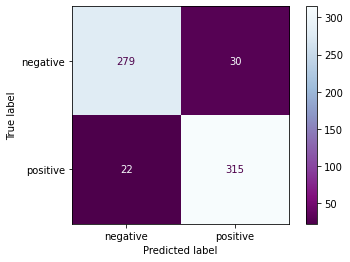

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test,cmap='BuPu_r',display_labels=['negative','positive'])
plt.show()

## Predict & Output

In [ ]:
## predict with our model
clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,

## Testing

In [ ]:
## TEST 1

In [ ]:
# a simple prediction 1
comment = ["Check this out"]
vect = cv.transform(comment).toarray()
vect

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clf.predict(vect)

array([1])

In [ ]:
class_dict = {"Not Spam":0,"Spam":1}
class_dict.values()

dict_values([0, 1])

In [ ]:
if clf.predict(vect) == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


In [ ]:
## TEST 2

In [ ]:
# simple Prerdiction 2
comment1 = [str(input())]
vect = cv.transform(comment1).toarray()
print(clf.predict(vect))
if clf.predict(vect) == 1:
    print("Spam")
else:
    print("Not Spam")

good song
[0]
Not Spam


## Save The model

In [ ]:

import pickle as pk

In [ ]:
naivebayesML = open("YtbSpam_model.pkl","wb")

In [ ]:
pk.dump(clf,naivebayesML)

In [ ]:
naivebayesML.close()

In [ ]:
## load the model

ytb_model = open("YtbSpam_model.pkl","rb")

In [ ]:
new_model = pk.load(ytb_model)

In [ ]:
new_model

MultinomialNB()